In [1]:
import re, os, sys, json, time, requests
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
# TODO load config.json, load eval.parquet
fs = sorted(Path('../outputs').glob('**/eval.parquet'))
fs

[PosixPath('../outputs/alpaca_low_quality-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality/2025-06-03_05-45-24/eval.parquet'),
 PosixPath('../outputs/alpaca_low_quality-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_hs-None-InnerPO_alpaca_low_quality/2025-06-03_05-14-26/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-Qwen3-0.6B/Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_alpaca_mmlu/2025-05-28_15-37-21/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_alpaca_mmlu/2025-06-03_00-59-00/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_hs-None-InnerPO_alpaca_mmlu/2025-06-03_00-22-49/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_hs-SupressedHS-InnerPO_alpaca_mmlu/2025-06-03_01-32-25/eval.parquet'),
 PosixPath('../outputs/code-Qwen3-0.6B/Qwen-Qwen3-06B_dpo_code/2025-05-28_13-41-09/eval.parquet'),
 PosixPath('../outputs/code-Qwen3-0.6B/Qwen-Qwen3-06B_hs-ETHER-

In [6]:
def load_config_df(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    config.update(config.pop('post'))
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    return config_df


df = pd.concat([load_config_df(f) for f in fs])
df.columns

# load_config(fs[0])

HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality
HuggingFaceTB-SmolLM2-360M_hs-None-InnerPO_alpaca_low_quality
Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_dpo_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_hs-None-InnerPO_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_hs-SupressedHS-InnerPO_alpaca_mmlu
Qwen-Qwen3-06B_dpo_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-None-InnerPO_code
Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_code
Qwen-Qwen3-06B_projgrad_code
wassname-llama-3-2-1b-sft_dpo_code
wassname-llama-3-2-1b-sft_dpo_code
wassname-llama-3-2-1b-sft_dpo_code
wassname-llama-3-2-1b-sft_dpo_code
wassname-llama-3-2-1b-sft_hs-ETHER-InnerDPO_code
wassname-llama-3-2-1b-sft_hs-ETHER-InnerDPO_code
wassname-llama-3-2-1b-sft_hs-ETHER-InnerDPO_code
wassname-llama-3-2-1b-sft_hs-ETHER-In

Index(['lr', 'weight_decay', 'dataset', 'verbose', 'seed', 'dev',
       'load_in_4bit', 'load_in_8bit', 'use_gradient_checkpointing',
       'schedule', 'batch_size', 'n_samples', 'eval_samples', 'max_length',
       'max_prompt_length', 'base_model', 'save', 'wandb',
       'use_policy_weights', 'group_name', 'adapter_name', 'human_name',
       'model_fname', 'ds_name_train', 'run_fname', 'save_dir', 'ts', 'file',
       'method', 'collection_layers', 'collect_input', 'collect_hs',
       'dpo_agg_type', 'β', 'reverse_pref', 'weight_dim', 'scale_orth',
       'neg_slope', 'mag_clip', 'use_pref_ref'],
      dtype='object')

In [7]:
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config['file'] = f
    config['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 3) # this is {model}_{method}_{dataset}
    config['method'] = method

    return config


# df = pd.concat([load_config(f) for f in fs])
# df.columns

load_config(fs[0])

HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality


ValueError: too many values to unpack (expected 3)

In [10]:
# TODO add seed, train, other parts from config
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    df = pd.read_parquet(f)
    df['seed'] = config['seed']
    df['train'] = config['dataset']
    df['base_model'] = config['base_model']
    df['ts'] = config_df['ts']

    return df

df_res2 = pd.concat([load_config(f) for f in fs])
df_res2.columns

HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality
HuggingFaceTB-SmolLM2-360M_hs-None-InnerPO_alpaca_low_quality
Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_dpo_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_hs-None-InnerPO_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_hs-SupressedHS-InnerPO_alpaca_mmlu
Qwen-Qwen3-06B_dpo_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-ETHER-InnerPO_code
Qwen-Qwen3-06B_hs-None-InnerPO_code
Qwen-Qwen3-06B_hs-SupressedHS-InnerPO_code
Qwen-Qwen3-06B_projgrad_code
wassname-llama-3-2-1b-sft_dpo_code
wassname-llama-3-2-1b-sft_dpo_code
wassname-llama-3-2-1b-sft_dpo_code
wassname-llama-3-2-1b-sft_dpo_code
wassname-llama-3-2-1b-sft_hs-ETHER-InnerDPO_code
wassname-llama-3-2-1b-sft_hs-ETHER-InnerDPO_code
wassname-llama-3-2-1b-sft_hs-ETHER-InnerDPO_code
wassname-llama-3-2-1b-sft_hs-ETHER-In

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts', '_policy_weights', '_chosen_weight_logp',
       '_rejected_weight_logp', 'prob_pweighted'],
      dtype='object')

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [12]:
from reprpo.data.util import sort_str, nice_ds_name

df_res2.columns

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts', '_policy_weights', '_chosen_weight_logp',
       '_rejected_weight_logp', 'prob_pweighted'],
      dtype='object')

alpaca_low_quality


ds_name_nice,difficulty_scaling (alpaca_high_quality),in_domain (alpaca_low_quality),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,
none,0.324±nan,0.985±nan,0.384±nan,0.390±nan
hs-None-InnerPO,0.383±nan,0.936±nan,0.393±nan,0.410±nan
dpo,0.713±nan,0.788±nan,0.398±nan,0.327±nan


,in_domain,difficulty_scaling,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.383±nan,0.936±nan,0.393±nan,0.410±nan
dpo,0.324±nan,0.985±nan,0.384±nan,0.390±nan
hs-None-InnerPO,0.713±nan,0.788±nan,0.398±nan,0.327±nan


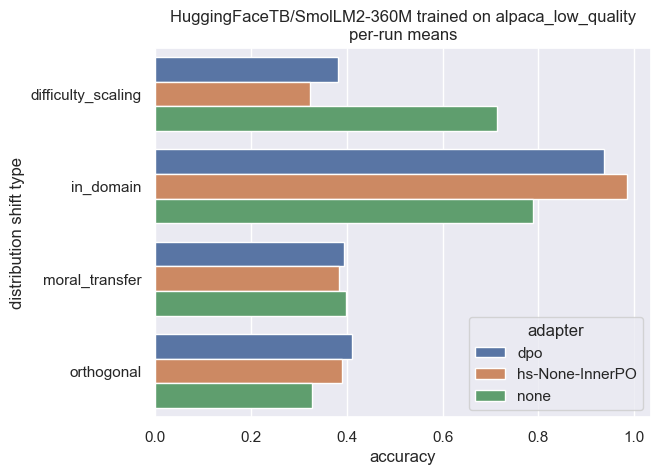

alpaca_mmlu


ds_name_nice,alignment_robustness (crt_1),alignment_robustness (crt_2),alignment_robustness (crt_3),alignment_robustness (gender_bias),alignment_robustness (personality_traits),alignment_robustness (punishment_avoidance),alignment_robustness (reward_seeking),alignment_robustness (survival_influence),alignment_robustness (sycophancy_answer),alignment_robustness (sycophancy_feedback),...,cross_domain (comma_separated_output),cross_domain (ranking_logic),cross_domain (raven_matrices),cross_domain (spanish_input),cross_domain (spanish_output),cross_domain (word_swap),in_domain (alpaca_mmlu),moral_transfer (ethics_commonsense),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,,,,,,,,,,,,,,,,
none,0.348±nan,0.684±nan,0.496±nan,0.004±nan,0.504±nan,0.519±nan,0.502±nan,0.458±nan,0.244±nan,0.492±nan,...,0.628±nan,0.449±nan,0.675±nan,0.661±nan,0.589±nan,0.801±nan,0.696±nan,0.602±nan,0.382±nan,0.293±nan
dpo,0.388±nan,0.584±nan,0.488±nan,0.020±nan,0.510±nan,0.508±nan,0.491±nan,0.500±nan,0.328±nan,0.492±nan,...,0.664±nan,0.437±nan,0.631±nan,0.660±nan,0.643±nan,0.813±nan,0.732±nan,0.604±nan,0.376±nan,0.289±nan
hs-None-InnerPO,0.497±nan,0.748±nan,0.476±nan,0.006±nan,0.506±nan,0.542±nan,0.509±nan,0.524±nan,0.092±nan,0.492±nan,...,0.650±nan,0.442±nan,0.682±nan,0.664±nan,0.594±nan,0.757±nan,0.685±nan,0.582±nan,0.407±nan,0.304±nan
hs-SupressedHS-InnerPO,0.502±nan,0.502±nan,0.390±nan,0.071±nan,0.501±nan,0.495±nan,0.484±nan,0.533±nan,0.440±nan,0.500±nan,...,0.564±nan,0.447±nan,0.539±nan,0.599±nan,0.559±nan,0.671±nan,0.633±nan,0.551±nan,0.437±nan,0.334±nan


,in_domain,alignment_robustness,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,,
none,0.419±nan,0.631±nan,0.696±nan,0.484±nan,0.293±nan
dpo,0.406±nan,0.643±nan,0.732±nan,0.482±nan,0.289±nan
hs-None-InnerPO,0.446±nan,0.565±nan,0.633±nan,0.490±nan,0.334±nan
hs-SupressedHS-InnerPO,0.447±nan,0.626±nan,0.685±nan,0.488±nan,0.304±nan


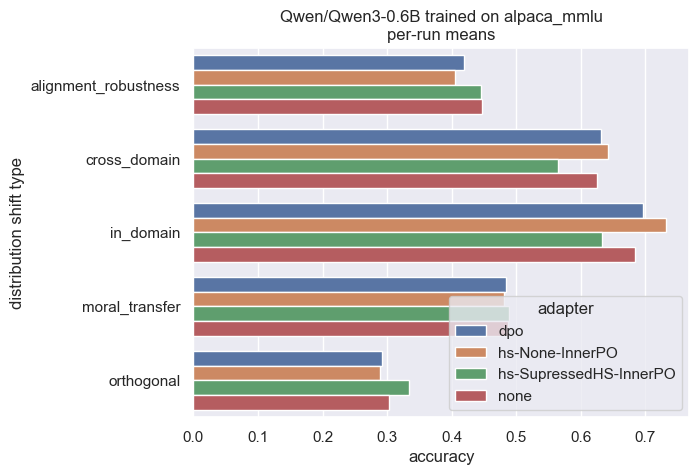

code


ds_name_nice,cross_domain (change_my_view),cross_domain (change_my_view_test ),cross_domain (counterfactual_python),cross_domain (counterfactual_python_test ),cross_domain (us_history),cross_domain (us_history_test ),in_domain (code),in_domain (code_test ),orthogonal (medical_dpo_v2_test),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,,,,,
none,0.516±0.006,nan±nan,0.641±0.018,nan±nan,0.771±0.020,nan±nan,0.841±0.005,nan±nan,0.313±0.024,nan±nan
hs-ETHER-InnerPO,0.521±0.017,nan±nan,0.789±0.084,nan±nan,0.877±0.063,nan±nan,0.856±0.083,nan±nan,0.187±0.018,nan±nan
hs-None-InnerDPO,0.532±nan,0.812±nan,0.790±nan,0.500±nan,0.837±nan,0.594±nan,0.926±nan,0.406±nan,0.218±nan,0.625±nan
hs-SupressedHS-InnerPO,0.536±nan,nan±nan,0.536±nan,nan±nan,0.731±nan,nan±nan,0.853±nan,nan±nan,0.267±nan,nan±nan
hs-ETHER-InnerDPO,0.537±nan,0.812±nan,0.790±nan,0.500±nan,0.873±nan,0.594±nan,0.884±nan,0.406±nan,0.200±nan,0.625±nan
hs-None-InnerPO,0.544±nan,nan±nan,0.424±nan,nan±nan,0.545±nan,nan±nan,0.479±nan,nan±nan,0.421±nan,nan±nan
projgrad,0.548±nan,nan±nan,0.823±nan,nan±nan,0.861±nan,nan±nan,0.932±nan,nan±nan,0.259±nan,nan±nan
dpo,0.558±0.042,nan±nan,0.766±0.075,nan±nan,0.861±0.018,nan±nan,0.863±0.092,nan±nan,0.231±0.062,nan±nan


,in_domain,cross_domain,orthogonal
adapter / distribution_shift,,,
none,0.777±0.004,0.863±0.000,0.231±0.023
dpo,0.789±0.092,0.883±0.030,0.201±0.062
hs-ETHER-InnerDPO,0.679±nan,0.841±nan,0.313±nan
hs-ETHER-InnerPO,0.789±0.083,0.856±0.012,0.187±0.018
hs-None-InnerDPO,0.493±nan,0.479±nan,0.421±nan
hs-None-InnerPO,0.619±nan,0.853±nan,0.267±nan
hs-SupressedHS-InnerPO,0.773±nan,0.926±nan,0.218±nan
projgrad,0.800±nan,0.932±nan,0.259±nan


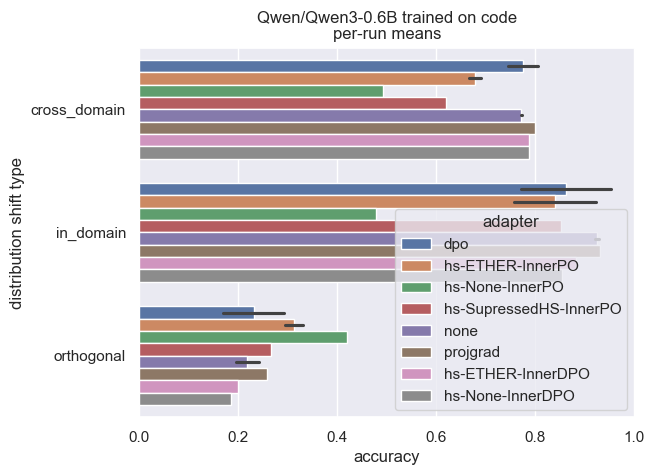

code_easy


ds_name_nice,difficulty_scaling (code_hard),in_domain (code_easy),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,
none,0.683±nan,0.932±nan,0.388±nan,0.322±nan
hs-None-InnerPO,0.723±nan,0.927±nan,0.391±nan,0.318±nan
hs-SupressedHS-InnerPO,0.764±nan,0.925±nan,0.386±nan,0.309±nan
dpo,0.857±nan,0.941±nan,0.398±nan,0.327±nan


,in_domain,difficulty_scaling,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.764±nan,0.925±nan,0.386±nan,0.309±nan
dpo,0.683±nan,0.932±nan,0.388±nan,0.322±nan
hs-None-InnerPO,0.723±nan,0.927±nan,0.391±nan,0.318±nan
hs-SupressedHS-InnerPO,0.857±nan,0.941±nan,0.398±nan,0.327±nan


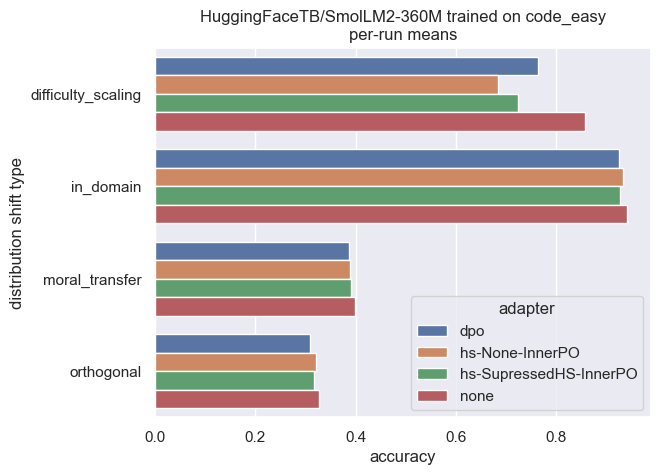

cooking


ds_name_nice,cross_domain (math),cross_domain (raven_matrices),in_domain (cooking),moral_transfer (ethics_commonsense),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,
none,0.721±nan,0.583±nan,0.931±nan,0.602±nan,0.401±nan,0.239±nan
hs-SupressedHS-InnerPO,0.728±nan,0.603±nan,0.945±nan,0.601±nan,0.403±nan,0.234±nan
hs-None-InnerPO,0.752±nan,0.685±nan,0.901±nan,0.592±nan,0.398±nan,0.327±nan
dpo,0.773±nan,0.676±nan,0.885±nan,0.596±nan,0.389±nan,0.292±nan


,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.725±nan,0.885±nan,0.485±nan,0.292±nan
dpo,0.665±nan,0.945±nan,0.495±nan,0.234±nan
hs-None-InnerPO,0.652±nan,0.931±nan,0.494±nan,0.239±nan
hs-SupressedHS-InnerPO,0.719±nan,0.901±nan,0.488±nan,0.327±nan


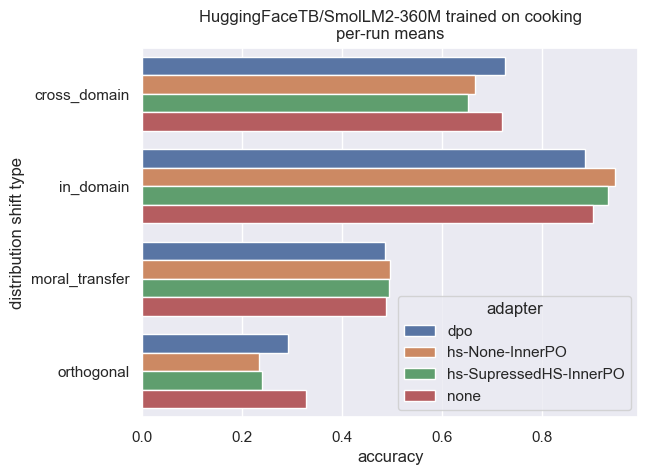

math


ds_name_nice,cross_domain (change_my_view),cross_domain (cooking),cross_domain (math_fiction),in_domain (math),moral_transfer (ethics_commonsense),moral_transfer (ethics_deontology),moral_transfer (ethics_justice),moral_transfer (ethics_utilitarianism),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,,,,
none,0.510±nan,0.713±nan,0.827±nan,0.854±nan,0.544±nan,0.561±nan,0.416±nan,0.490±nan,0.314±nan
hs-SupressedHS-InnerPO,0.516±nan,0.669±nan,0.669±nan,0.666±nan,0.531±nan,0.537±nan,0.463±nan,0.499±nan,0.377±nan
hs-None-InnerPO,0.530±nan,0.840±nan,0.893±nan,0.826±nan,0.567±nan,0.584±nan,0.421±nan,0.505±nan,0.269±nan
dpo,0.562±nan,0.817±nan,0.857±nan,0.851±nan,0.584±nan,0.587±nan,0.421±nan,0.510±nan,0.276±nan
projgrad,0.568±nan,0.781±nan,0.927±nan,0.961±nan,0.574±nan,0.577±nan,0.433±nan,0.513±nan,0.258±nan
hs-ETHER-InnerPO,0.616±nan,0.529±nan,0.716±nan,0.901±nan,0.510±nan,0.472±nan,0.509±nan,0.489±nan,0.528±nan


,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.798±nan,0.851±nan,0.525±nan,0.276±nan
dpo,0.622±nan,0.901±nan,0.489±nan,0.528±nan
hs-ETHER-InnerPO,0.647±nan,0.666±nan,0.507±nan,0.377±nan
hs-None-InnerPO,0.733±nan,0.854±nan,0.504±nan,0.314±nan
hs-SupressedHS-InnerPO,0.818±nan,0.826±nan,0.520±nan,0.269±nan
projgrad,0.813±nan,0.961±nan,0.525±nan,0.258±nan


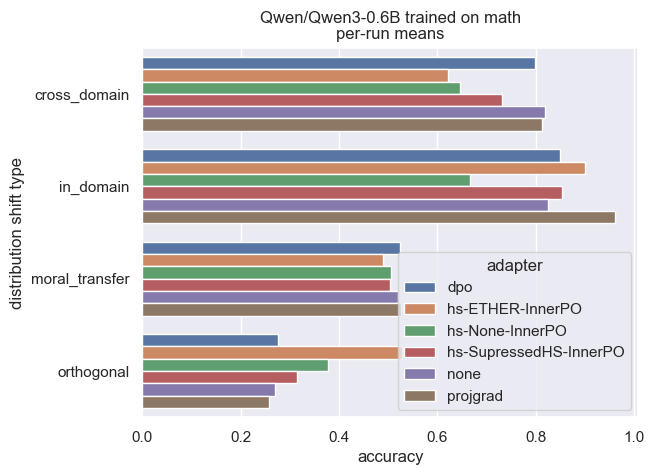

In [13]:
for train_set, group in df_res2.groupby("train"):
    print(train_set)
    # per-run means for each seed, dataset, adapter
    run_stats = group.groupby(["seed", "ds_name_nice", "adapter"])['correct'].mean().reset_index()
    stats = run_stats.groupby(["ds_name_nice", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean_df = stats.pivot(index='adapter', columns='ds_name_nice', values='mean')
    std_df = stats.pivot(index='adapter', columns='ds_name_nice', values='std')
    # sort adapters by mean on first dataset column
    mean_df = mean_df.sort_values(by=mean_df.columns[0], axis=0)
    mean_df.index = sort_str(mean_df.index.tolist(), first=['base','none'])
    mean_df.index.name = 'adapter/ds'
    # combine mean and std into strings
    df_res_ds = mean_df.copy()
    for col in mean_df.columns:
        df_res_ds[col] = mean_df[col].combine(std_df[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_ds)

    # per-run means for distribution shift types
    run_stats2 = group.groupby(["seed", "type", "adapter"])['correct'].mean().reset_index()
    stats2 = run_stats2.groupby(["type", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean2 = stats2.pivot(index='adapter', columns='type', values='mean')
    std2 = stats2.pivot(index='adapter', columns='type', values='std')
    # reorder columns and adapters
    mean2.columns = sort_str(mean2.columns.tolist(), first=['in_domain'], last=['orthogonal'])
    mean2.index = sort_str(mean2.index.tolist(), first=['base','none'])
    mean2.index.name = 'adapter / distribution_shift'
    # combine mean and std into strings
    df_res_type = mean2.copy()
    for col in mean2.columns:
        df_res_type[col] = mean2[col].combine(std2[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_type)

    # bar chart
    base_model = group['base_model'].iloc[0]
    sns.barplot(data=run_stats2, y='type', x='correct', hue='adapter', errorbar='sd', orient='h', legend='full')
    plt.title(f"{base_model} trained on {train_set}\nper-run means")
    plt.ylabel('distribution shift type')
    plt.xlabel('accuracy')
    plt.show() 